# Imported Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model #GARCH Models
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import math
from statistics import NormalDist
from scipy.stats import t
from datetime import datetime
from scipy.stats import shapiro #Shapiro Test
from scipy import stats #t-test
import statsmodels.api as sm #Ljung-Box Test
from scipy.stats import chi2

# Data

In [2]:
start_date = '2006-01-01' #yyyy-mm-dd
end_date = '2021-01-01'


#Philippines
PH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/PSEi.csv')
PH['Date'] = pd.to_datetime(PH['Date'])
PH = PH.rename(columns={'Price': 'Close'})
PH = PH.replace(',','', regex=True)
PH['Close'] = PH['Close'].astype(float, errors = 'raise')
mask = (PH['Date'] >= start_date) & (PH['Date'] <= end_date)
PH = PH.loc[mask]
PH = PH.set_index('Date')
PH = PH.sort_index(axis=0, ascending = False)

#Malaysia
MY = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/%5EKLSE.csv')
MY['Date'] = pd.to_datetime(MY['Date'])
MY = MY.rename(columns={'Price': 'Close'})
MY = MY.replace(',','', regex=True)
MY['Close'] = MY['Close'].astype(float, errors = 'raise')
mask = (MY['Date'] >= start_date) & (MY['Date'] <= end_date)
MY = MY.loc[mask]
MY = MY.set_index('Date')
MY = MY.sort_index(axis=0, ascending = False)

#Signapore
SG = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/STI.csv')
SG['Date'] = pd.to_datetime(SG['Date'])
SG = SG.replace(',','', regex=True)
SG['Close'] = SG['Close'].astype(float, errors = 'raise')
mask = (SG['Date'] >= start_date) & (SG['Date'] <= end_date)
SG = SG.loc[mask]
SG= SG.set_index('Date')
SG = SG.sort_index(axis=0, ascending = False)

#Thailand
TH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/SETi.csv')
TH['Date'] = pd.to_datetime(TH['Date'])
TH = TH.rename(columns={'Price': 'Close'})
TH = TH.replace(',','', regex=True)
TH['Close'] = TH['Close'].astype(float, errors = 'raise')
mask = (TH['Date'] >= start_date) & (TH['Date'] <= end_date)
TH = TH.loc[mask]
TH= TH.set_index('Date')
TH = TH.sort_index(axis=0, ascending = False)

#Vietnam
VT = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/HNX.csv')
VT['Date'] = pd.to_datetime(VT['Date'])
VT = VT.rename(columns={'Price': 'Close'})
VT = VT.replace(',','', regex=True)
VT['Close'] = VT['Close'].astype(float, errors = 'raise')
mask = (VT['Date'] >= start_date) & (VT['Date'] <= end_date)
VT = VT.loc[mask]
VT= VT.set_index('Date')
VT = VT.sort_index(axis=0, ascending = False)

# Logarithmic Returns

In [3]:
def get_returns(df,d):
    '''
    The function obtains the log returns of the asset shifted d days
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    d : int
        The dth day being forecast
        (Assumed to be 1 for most cases)
        
    RETURNS
    -------
    df : pandas.DataFrame
        The data frame returns an updated data frame containing the
        'Returns' column
    '''
    df['Previous'] = df['Close'].shift(-d)
    df['Returns'] = np.log(df['Close']/df['Previous'])*100
    display(df)
    return df

PH = get_returns(PH, 1)
MY = get_returns(MY, 1)
SG = get_returns(SG, 1)
TH = get_returns(TH, 1)
VT = get_returns(VT, 1)

,Open,High,Low,Close,Previous,Returns
Date,,,,,,
2020-12-29,7123.12,7173.27,7120.82,7139.71,7122.25,0.244847
2020-12-28,7142.95,7142.95,7058.66,7122.25,7204.38,-1.146549
2020-12-23,7169.05,7206.46,7075.18,7204.38,7202.39,0.027626
2020-12-22,7206.33,7206.54,7081.14,7202.39,7224.89,-0.311909
2020-12-21,7244.85,7251.02,7157.88,7224.89,7272.80,-0.660935
...,...,...,...,...,...,...
2006-01-06,2150.57,2157.18,2132.05,2133.79,2150.93,-0.800057
2006-01-05,2138.29,2150.93,2129.34,2150.93,2138.05,0.600611
2006-01-04,2129.97,2144.04,2129.97,2138.05,2109.79,1.330578


,Open,High,Low,Close,Previous,Returns
Date,,,,,,
2020-12-31,1627.21,1627.21,1627.21,1627.21,1644.41,-1.051477
2020-12-30,1644.41,1644.41,1644.41,1644.41,1634.99,0.574497
2020-12-29,1634.99,1634.99,1634.99,1634.99,1643.90,-0.543478
2020-12-28,1643.90,1643.90,1643.90,1643.90,1641.17,0.166207
2020-12-24,1641.17,1641.17,1641.17,1641.17,1647.50,-0.384959
...,...,...,...,...,...,...
2006-01-09,913.65,916,912.4,913.80,911.67,0.233365
2006-01-06,906.6,912.07,906.6,911.67,906.66,0.551056
2006-01-05,897.34,908.71,897.34,906.66,897.13,1.056674


,Open,High,Low,Close,Previous,Returns
Date,,,,,,
2020-12-31,2853.60,2861.61,2843.81,2843.81,2869.22,-0.889551
2020-12-30,2855.06,2878.13,2846.22,2869.22,2848.14,0.737407
2020-12-29,2848.65,2852.65,2840.38,2848.14,2840.14,0.281280
2020-12-28,2845.85,2840.14,2840.14,2840.14,2842.04,-0.066876
2020-12-24,2840.65,2847.80,2834.14,2842.04,2833.40,0.304470
...,...,...,...,...,...,...
2006-01-09,2353.33,2353.33,2353.33,2353.33,2348.89,0.188847
2006-01-06,2348.89,2348.89,2348.89,2348.89,2334.08,0.632507
2006-01-05,2334.08,2334.08,2334.08,2334.08,2316.90,0.738772


,Close,Open,High,Low,Vol.,Change %,Previous,Returns
Date,,,,,,,,
2020-12-30,1449.35,1467.74,1479.04,1445.36,22.62B,-0.86%,1461.95,-0.865598
2020-12-29,1461.95,1452.39,1468.60,1440.59,22.53B,0.64%,1452.67,0.636792
2020-12-28,1452.67,1505.15,1512.99,1452.48,24.91B,-2.26%,1486.31,-2.289330
2020-12-25,1486.31,1463.32,1486.84,1462.77,21.09B,2.40%,1451.52,2.368526
2020-12-24,1451.52,1420.60,1453.87,1409.75,25.46B,2.51%,1416.02,2.476116
...,...,...,...,...,...,...,...,...
2006-01-09,762.26,749.04,762.29,749.04,7.76B,2.00%,747.34,1.976747
2006-01-06,747.34,743.91,747.77,737.02,5.49B,0.82%,741.28,0.814181
2006-01-05,741.28,750.13,752.65,740.19,6.91B,-0.26%,743.20,-0.258677


,Close,Open,High,Low,Vol.,Change %,Previous,Returns
Date,,,,,,,,
2020-12-31,203.12,196.94,203.15,194.34,100.18K,3.14%,196.94,3.089782
2020-12-30,196.94,197.10,197.32,192.06,110.79K,-0.08%,197.10,-0.081210
2020-12-29,197.10,196.58,197.85,194.20,101.70K,0.27%,196.57,0.269261
2020-12-28,196.57,192.46,198.08,192.44,122.33K,2.14%,192.46,2.113026
2020-12-25,192.46,187.63,192.67,183.87,98.21K,2.57%,187.63,2.541640
...,...,...,...,...,...,...,...,...
2006-01-13,90.55,90.55,90.84,90.55,0.32K,-0.26%,90.79,-0.264696
2006-01-11,90.79,90.79,90.79,90.79,0.24K,0.00%,90.79,0.000000
2006-01-09,90.79,90.79,90.79,90.79,0.08K,-0.15%,90.93,-0.154083


# Visualization of the Returns

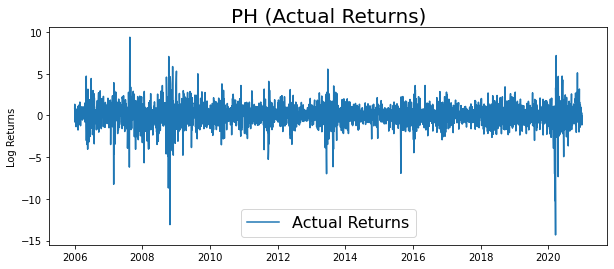

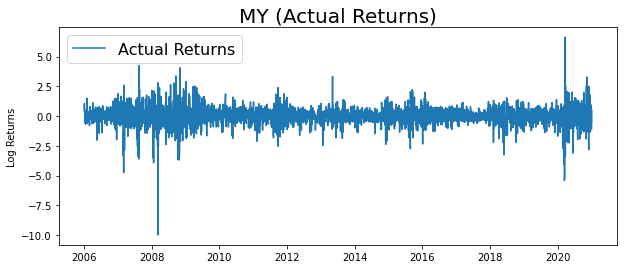

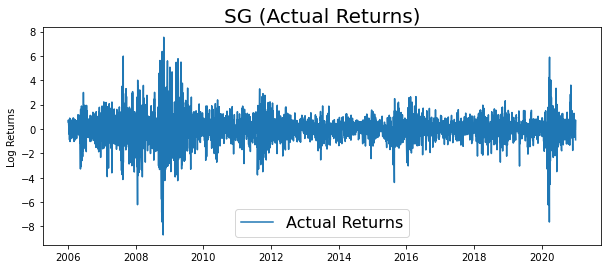

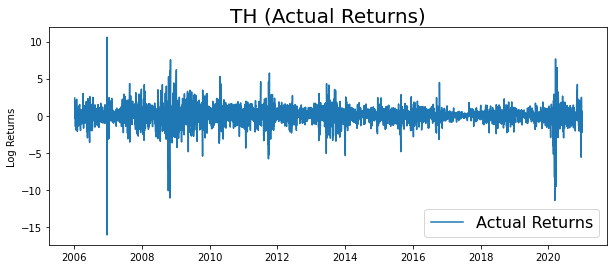

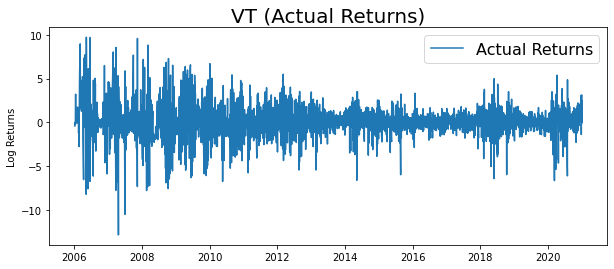

In [4]:
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'])
plt.ylabel('Log Returns')
plt.title('PH (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(MY['Returns'])
plt.ylabel('Log Returns')
plt.title('MY (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(SG['Returns'])
plt.ylabel('Log Returns')
plt.title('SG (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(TH['Returns'])
plt.ylabel('Log Returns')
plt.title('TH (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(VT['Returns'])
plt.ylabel('Log Returns')
plt.title('VT (Actual Returns)', fontsize=20)
plt.legend(['Actual Returns'], fontsize=16)

# Estimating VaR
## Parameters

In [5]:
alpha = 0.05
decay = 0.992

In [6]:
def get_weights_df(df, d, decay_par):
    count_returns = len(df["close"])-d # M
    weight_lst = [(1-decay_par)*(decay_par**j)/(1-decay_par**count_returns) for j in range(count_returns)]
    df["weight"] = pd.Series(weight_lst)
    return df

def get_ecdf(df):
    df = df.sort_values(by="change_in_value")
    df["ecdf"] = df["weight"].cumsum()
    return df

def get_VaR_BRW(df, alpha, decay_par):
    M = len(df['Returns'])
    weight_lst = [(1-decay_par)*(decay_par**j)/(1-decay_par**M) for j in range(M)]
    #display(weight_lst)
    weight_df = pd.DataFrame(weight_lst, columns = ['Weight'])
    df = df.reset_index()
    df = pd.merge(df, weight_df, left_index = True, right_index = True)
    df = df.set_index('Date')
    df = df.sort_values(by="Returns")
    df["ECDF"] = df["Weight"].cumsum()
    VaR = abs(np.interp(1-alpha, df["ECDF"], df["Returns"]))
    return round(VaR, 5)



#Philippines
print(f' PH : {get_VaR_BRW(PH, alpha, decay)}')

#Malaysia"
print(f' MY : {get_VaR_BRW(MY, alpha, decay)}')

#Singapore
print(f' SG : {get_VaR_BRW(SG, alpha, decay)}')

#Thailand
print(f' TH : {get_VaR_BRW(TH, alpha, decay)}')

#Vietnam
print(f' VT : {get_VaR_BRW(VT, alpha, decay)}')

 PH : 2.57222
 MY : 1.64242
 SG : 1.61638
 TH : 2.18847
 VT : 2.54111


# Fixed Window
## Parameters

In [7]:
prediction_size = 365
alpha = 0.05
decay_par = 0.992
name = 'FW-BRW-5%'

In [8]:
def fixed_window(df, test_size, alpha, decay_par):
    '''
    The function returns the (1-alpha)% d-day VaR of the asset staring at
    time t = test size to the present using a fixed time window of size test_size
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    test_size : int
        The test size is used to create a time window to estimate VaR
        using smaller time periods
        (The test size cannot be greater than the total number of entries
        of the data frame)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)
    decay_par : float
        The parameter for the BRW approach. Standard value is 0.992-0.998.
        The parameter is a value between 0 and 1.
    
    RETURNS
    -------
    VaR_df : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the fixed time window 
    '''
    VaR_lst = []
    date_df = df[:test_size].reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = df[test_size-i:-(i+1)]
        temp_VaR = get_VaR_BRW(temp_df, alpha, decay_par)
        VaR_lst.append(temp_VaR)
    VaR_lst = VaR_lst[::-1]
    VaR_df = pd.DataFrame(VaR_lst, columns = ['Forecasted VaR'])
    VaR_df = pd.merge(date_df, VaR_df, left_index = True, right_index = True)
    VaR_df = VaR_df.set_index('Date')
    VaR_df.index = pd.to_datetime(VaR_df.index, utc = None)
    return VaR_df

#Standard 250 test subjects


PH_fw_brw = fixed_window(PH, prediction_size, alpha, decay_par)
MY_fw_brw = fixed_window(MY, prediction_size, alpha, decay_par)
SG_fw_brw = fixed_window(SG, prediction_size, alpha, decay_par)
TH_fw_brw = fixed_window(TH, prediction_size, alpha, decay_par)
VT_fw_brw = fixed_window(VT, prediction_size, alpha, decay_par)


# VaR Violations FW

In [9]:
def char_function(df, window, test_size, name):
    '''
    The function returns the number of VaR violations.
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a} chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
        (Data frames must be the same size)
    window : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the rolling time window 
        (Data frames must be the same size)
        
    RETURNS
    -------
    N : int
        The value is the number of VaR violations
    '''
#     returns = abs(df['Returns'][:test_size].dropna())
    returns = df['Returns'][:test_size].dropna()
    f_returns = window['Forecasted VaR'].dropna()
    N = 0
    violation_lst = []
    for i, j in zip(returns, f_returns):
        if i > j:
            violation_lst.append(1)
            N += 1 
        else:
            violation_lst.append(0)

    violations = pd.Series(violation_lst, index = returns.index, name = name)
    df = df.join(violations)
    display(N)
    return df, N

        

#Philippines
PH, PH_N_fw_brw = char_function(PH, PH_fw_brw, prediction_size, name)  

#Malaysia
MY, MY_N_fw_brw = char_function(MY, MY_fw_brw, prediction_size, name)     

#Singapore
SG, SG_N_fw_brw = char_function(SG, SG_fw_brw, prediction_size, name)      

#Thailand
TH, TH_N_fw_brw = char_function(TH, TH_fw_brw, prediction_size, name)

#Vietnam
VT, VT_N_fw_brw = char_function(VT, VT_fw_brw, prediction_size, name)

25

28

21

28

28

# Visualization of the Fixed Window

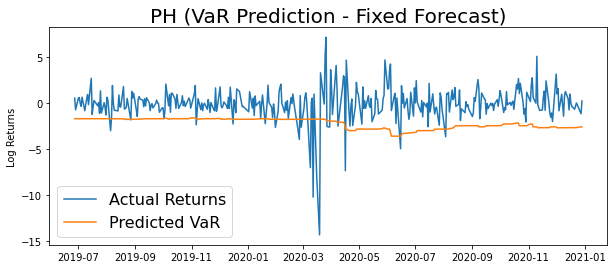

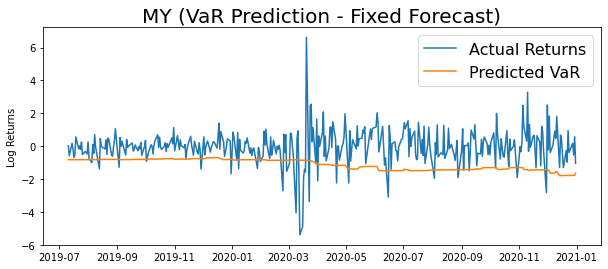

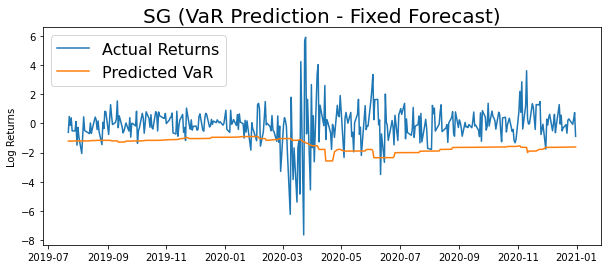

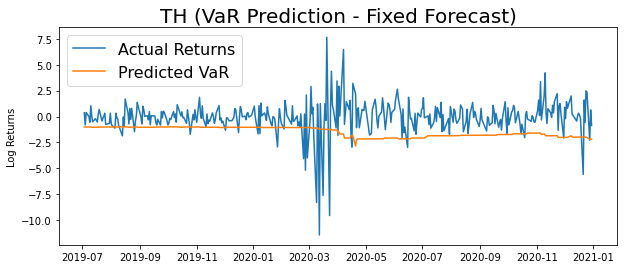

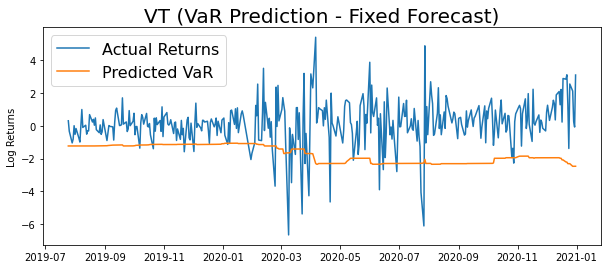

In [10]:
#Standard

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-prediction_size)])
plt.plot(-PH_fw_brw)
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-prediction_size)])
plt.plot(-MY_fw_brw)
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-prediction_size)])
plt.plot(-SG_fw_brw)
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(TH)-prediction_size)])
plt.plot(-TH_fw_brw)
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'].iloc[:-(len(VT)-prediction_size)])
plt.plot(-VT_fw_brw)
plt.ylabel('Log Returns')
plt.title('VT (VaR Prediction - Fixed Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# Rolling Window
## Parameters

In [11]:
prediction_size = 365
alpha = 0.05
decay_par = 0.992
name = 'RW-BRW-5%'

In [12]:
def rolling_window(df, test_size, alpha, decay_par):
    '''
    The function returns the (1-alpha)% d-day VaR of the asset staring at
    time t = test size to the present using a smaller time window to begin
    and gradually increasing the size
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
    test_size : int
        The test size is used to create a time window to estimate VaR
        using smaller time periods
        (The test size cannot be greater than the total number of entries
        of the data frame)
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)
    decay_par : float
        The parameter for the BRW approach. Standard value is 0.992-0.998.
        The parameter is a value between 0 and 1.

    RETURNS
    -------
    VaR_df : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the rolling time window 
    '''
    VaR_lst = []
    date_df = df[:test_size].reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = df[test_size-i:-(i+1)]
        temp_VaR = get_VaR_BRW(temp_df, alpha, decay_par)
        VaR_lst.append(temp_VaR)
    VaR_lst = VaR_lst[::-1]
    VaR_df = pd.DataFrame(VaR_lst, columns = ['Forecasted VaR'])
    VaR_df = pd.merge(date_df, VaR_df, left_index = True, right_index = True)
    VaR_df = VaR_df.set_index('Date')
    return VaR_df

#Standard


PH_rw_brw = rolling_window(PH, prediction_size, alpha, decay_par)
MY_rw_brw = rolling_window(MY, prediction_size, alpha, decay_par)
SG_rw_brw = rolling_window(SG, prediction_size, alpha, decay_par)
TH_rw_brw = rolling_window(TH, prediction_size, alpha, decay_par)
VT_rw_brw = rolling_window(VT, prediction_size, alpha, decay_par)

# VaR Violation RW

In [13]:
#Philippines
PH, PH_N_rw_brw = char_function(PH, PH_rw_brw, prediction_size, name) 

#Malaysia
MY, MY_N_rw_brw = char_function(MY, MY_rw_brw, prediction_size, name)

#Singapore
SG, SG_N_rw_brw = char_function(SG, SG_rw_brw, prediction_size, name)

#Thailand
TH, TH_N_rw_brw = char_function(TH, TH_rw_brw, prediction_size, name)

#Vietnam
VT, VT_N_rw_brw = char_function(VT, VT_rw_brw, prediction_size, name)

25

28

21

28

28

# Visualization of the Rolling Window

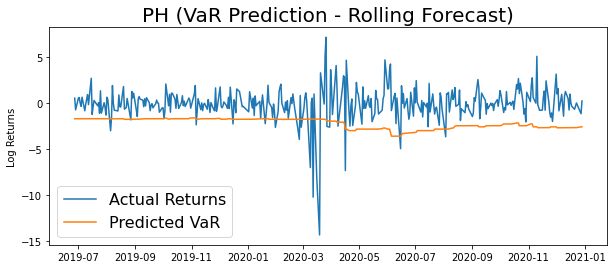

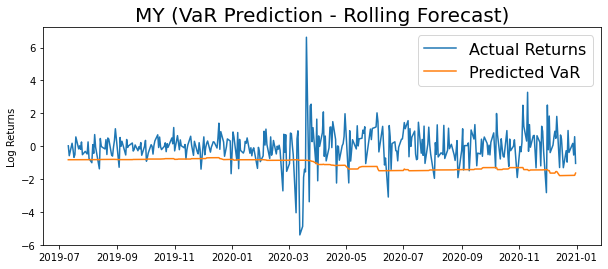

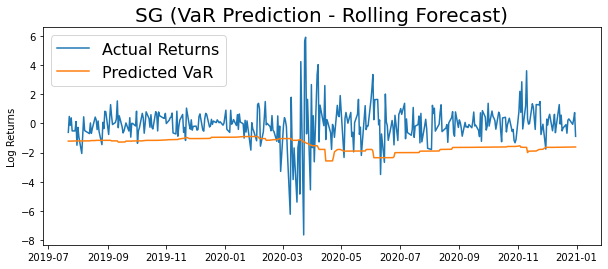

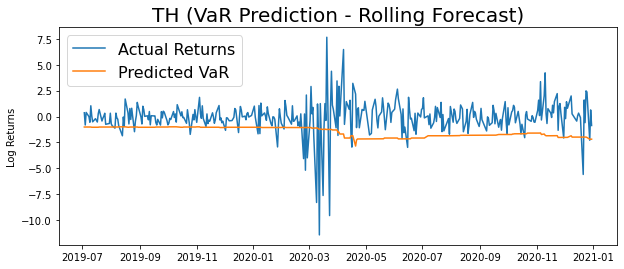

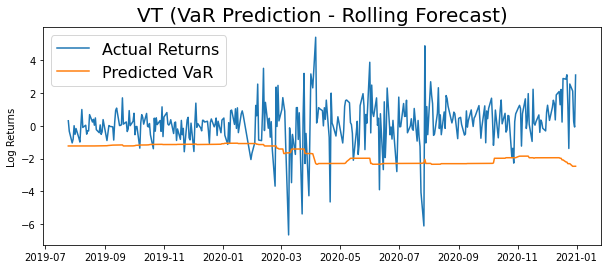

In [14]:
#Standard
#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'].iloc[:-(len(PH)-prediction_size)])
plt.plot(-PH_rw_brw)
plt.ylabel('Log Returns')
plt.title('PH (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'].iloc[:-(len(MY)-prediction_size)])
plt.plot(-MY_rw_brw)
plt.ylabel('Log Returns')
plt.title('MY (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'].iloc[:-(len(SG)-prediction_size)])
plt.plot(-SG_rw_brw)
plt.ylabel('Log Returns')
plt.title('SG (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'].iloc[:-(len(TH)-prediction_size)])
plt.plot(-TH_rw_brw)
plt.ylabel('Log Returns')
plt.title('TH (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'].iloc[:-(len(VT)-prediction_size)])
plt.plot(-VT_rw_brw)
plt.ylabel('Log Returns')
plt.title('VT (VaR Prediction - Rolling Forecast)', fontsize=20)
plt.legend(['Actual Returns', 'Predicted VaR'], fontsize=16)

# Suffieincy of the Model


## Unconditional Coverage

In [15]:
def CI_UC(alpha, ss):
    '''
    The function returns an (1-alpha)% confidence interval for N
    
    PARAMETERS
    ----------
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)
    ss : int
        The total number of entries in the data frame of the asset
        
    RETURNS
    -------
    CI : list
        The list is the (1-alpha)% confidence interval
    '''
    CI = []
    a = np.ceil(alpha*ss - (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
    b = np.ceil(alpha*ss + (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
    CI.append(a)
    CI.append(b)
    return CI


print(CI_UC(alpha,prediction_size))


[11.0, 27.0]


## Chi-squared Test (1 DoF)

In [16]:
chi2.ppf(1-alpha, df = 1)

3.841458820694124

## Conditional Coverage

In [17]:
chi2.ppf(1-alpha, df = 2)

5.991464547107979

# Parameters

In [18]:
alpha = 0.05
entries = 365
name_1 = 'FW-BRW-5%'
name_2 = 'RW-BRW-5%'


# Kupiec Test

In [19]:
def LR_kupiec(N, observations, alpha):
    p = alpha
    return -2*np.log((((1-p)**(observations - N))*(p**N))/(((1-N/observations)**(observations - N))*((N/observations)**N)))



#Philippines
PH_LRk_fw_brw = LR_kupiec(PH_N_fw_brw, entries, alpha)
PH_LRk_rw_brw = LR_kupiec(PH_N_rw_brw, entries, alpha)

#Malaysia
MY_LRk_fw_brw = LR_kupiec(MY_N_fw_brw, entries, alpha)
MY_LRk_rw_brw = LR_kupiec(MY_N_rw_brw, entries, alpha)

#Singapore
SG_LRk_fw_brw = LR_kupiec(SG_N_fw_brw, entries, alpha)
SG_LRk_rw_brw = LR_kupiec(SG_N_rw_brw, entries, alpha)

#Thailand
TH_LRk_fw_brw = LR_kupiec(TH_N_fw_brw, entries, alpha)
TH_LRk_rw_brw = LR_kupiec(TH_N_rw_brw, entries, alpha)

#Vietnam
VT_LRk_fw_brw = LR_kupiec(VT_N_fw_brw, entries, alpha)
VT_LRk_rw_brw = LR_kupiec(VT_N_rw_brw, entries, alpha)

# Christoffersen Test
## Part 1

In [20]:
def no_of_periods(df, name):
    n00 = 0
    n01 = 0
    n10 = 0
    n11 = 0
    violations = df[name].dropna()[::-1]
    v_p = violations[0]
    i = 1
    while i < len(violations):
        if v_p == violations[i] and v_p == 0:
            n00 += 1
        elif v_p != violations[i] and v_p == 0:
            n01 += 1
        elif v_p != violations[i] and v_p == 1:
            n10 += 1
        else:
            n11 += 1
        v_p = violations[i]
        i += 1 
    return n00, n01, n10, n11


#Philippines
PH_n00_fw_brw, PH_n01_fw_brw, PH_n10_fw_brw, PH_n11_fw_brw = no_of_periods(PH, name_1)
PH_n00_rw_brw, PH_n01_rw_brw, PH_n10_rw_brw, PH_n11_rw_brw = no_of_periods(PH, name_2)

#Malaysia
MY_n00_fw_brw, MY_n01_fw_brw, MY_n10_fw_brw, MY_n11_fw_brw = no_of_periods(MY, name_1)
MY_n00_rw_brw, MY_n01_rw_brw, MY_n10_rw_brw, MY_n11_rw_brw = no_of_periods(MY, name_2)

#Singapore
SG_n00_fw_brw, SG_n01_fw_brw, SG_n10_fw_brw, SG_n11_fw_brw = no_of_periods(SG, name_1)
SG_n00_rw_brw, SG_n01_rw_brw, SG_n10_rw_brw, SG_n11_rw_brw = no_of_periods(SG, name_2)

#Thailand
TH_n00_fw_brw, TH_n01_fw_brw, TH_n10_fw_brw, TH_n11_fw_brw = no_of_periods(TH, name_1)
TH_n00_rw_brw, TH_n01_rw_brw, TH_n10_rw_brw, TH_n11_rw_brw = no_of_periods(TH, name_2)

#Vietnamn
VT_n00_fw_brw, VT_n01_fw_brw, VT_n10_fw_brw, VT_n11_fw_brw = no_of_periods(VT, name_1)
VT_n00_rw_brw, VT_n01_rw_brw, VT_n10_rw_brw, VT_n11_rw_brw = no_of_periods(VT, name_2)

## Part 2

In [21]:
def LR_ind(df, name, LR_pof):
    n00, n01, n10, n11 = no_of_periods(df, name)
    pi_0 = n01/(n00+n01)
    pi_1 = n11/(n10+n11)
    pi = (n01+n11)/(n00+n01+n10+n11)
    LR_ind = -2*np.log((((1-pi)**(n00+n01))*(pi**(n01+n11)))/(((1-pi_0)**n00)*(pi_0**n01)*((1-pi_1)**n10)*(pi_1**n11)))
    LR_cc = LR_ind+LR_pof
    display(LR_cc)
    return LR_ind, LR_cc

#Philippines
PH_LRcci_fw_brw, PH_LRcc_fw_brw = LR_ind(PH, name_1, PH_LRk_fw_brw)
PH_LRcci_rw_brw, PH_LRcc_rw_brw = LR_ind(PH, name_2, PH_LRk_rw_brw)

#Malaysia
MY_LRcci_fw_brw, MY_LRcc_fw_brw = LR_ind(MY, name_1, MY_LRk_fw_brw)
MY_LRcci_rw_brw, MY_LRcc_rw_brw = LR_ind(MY, name_2, MY_LRk_rw_brw)

#Singapore
SG_LRcci_fw_brw,SG_LRcc_fw_brw = LR_ind(SG, name_1, SG_LRk_fw_brw)
SG_LRcci_rw_brw,SG_LRcc_rw_brw = LR_ind(SG, name_2, SG_LRk_rw_brw)

#Thailand
TH_LRcci_fw_brw,TH_LRcc_fw_brw = LR_ind(TH, name_1, TH_LRk_fw_brw)
TH_LRcci_rw_brw,TH_LRcc_rw_brw = LR_ind(TH, name_2, TH_LRk_rw_brw)

#Vietnam
VT_LRcci_fw_brw,VT_LRcc_fw_brw = LR_ind(VT, name_1, VT_LRk_fw_brw)
VT_LRcci_rw_brw,VT_LRcc_rw_brw = LR_ind(VT, name_2, VT_LRk_rw_brw)

3.2992187749388466

3.2992187749388466

5.101126352007222

5.101126352007222

5.244788864950776

5.244788864950776

4.760131871267776

4.760131871267776

6.614700372938297

6.614700372938297